# <center>________________________________________________________________</center>

# <center>DATA VISUALIZATION OF IMMIGRATION TO CANADA</center>

# <center>________________________________________________________________</center>

## Introduction
***

In this project, the immigration to Canada through 1980 - 2013 will be examined with different data visualization tools. Different aspects that affected the immigration between these years will be discussed and meaningful insights will be derived from different perspectives.

## The Dataset: Immigration to Canada from 1980 to 2013
***

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals.

In this project, we will focus on the Canadian immigration data.

![Data Preview](https://raw.githubusercontent.com/efeyemez/Portfolio/main/Datasets/DataSnapshot.png)

The Canada Immigration dataset can be fetched from <a href="https://github.com/efeyemez/Portfolio/raw/main/Datasets/Canada.xlsx">here</a>.

## Libraries
***

In [ ]:
# !pip install openpyxl

# !pip install pandas
# !pip install numpy


# !pip install matplotlib
# !pip install seaborn

# !pip install wordcloud

# !pip install folium

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import folium
import requests

In [2]:
# Styling matplotlib

print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Importing Data
***

Import the primary Canadian Immigration dataset:

In [3]:
df_can = pd.read_excel(
    'https://github.com/efeyemez/Portfolio/raw/main/Datasets/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a dataframe!')
df_can.head(3)

Data read into a dataframe!


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


## Editing Data
***

We will declare a variable that will allow us to easily call upon the full range of years:

In [4]:
years = list(map(str, range(1980, 2014)))

In [5]:
# Removing unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# Renaming and formatting the columns so that they make sense.
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))

# Adding a "Total" column that sums up the total immigrants by country over the entire period 1980 - 2013
df_can['Total'] = df_can[years].sum(axis=1)

# Setting "Country" column as index
df_can.set_index('Country', inplace=True)
df_can.index.name = None

df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


# <center>________________________________________________________________</center>

# <center>DATA VISUALIZATION</center>

# <center>________________________________________________________________</center>

# 1. LINE PLOTS
***

## A. Haiti - 2010 Earthquake Disaster

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can use a line graph of immigration from Haiti to visualize this effort:

In [6]:
# Extract the data for Haiti for years 1980 - 2013, excluding the 'Total' column

#df_haiti = df_can.loc['Haiti', years] # data as series
df_haiti = pd.DataFrame(df_can.loc['Haiti', years]) # data as a dataframe

df_haiti.head(3)

,Haiti
1980,1666
1981,3692
1982,3498


Next, we will change the index values of Haiti to type integer for plotting:

In [7]:
df_haiti.index = df_haiti.index.map(int)

### Line Plot - Haiti

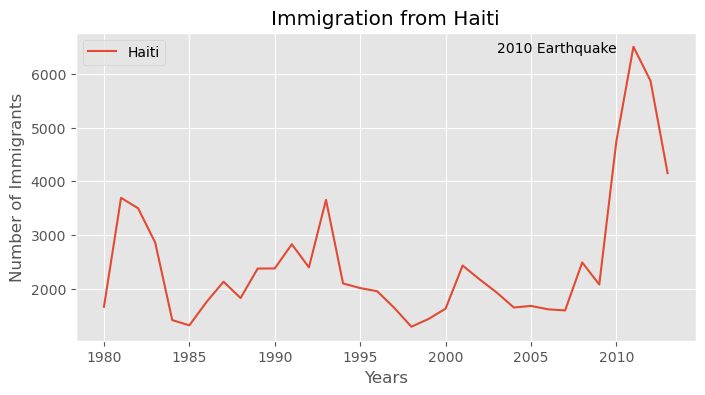

In [8]:
df_haiti.plot(kind='line', figsize = (8,4))

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2003, 6400, '2010 Earthquake')

plt.show() 

With a line plot, we quickly identify and visualize the spike in 2010 that was caused by the earthquake.

## B. China vs. India

We can easily add more countries to line plot to compare immigration from different countries. Now we will compare the number of immigrants from China and India from 1980 to 2013:

In [9]:
# Extract the data series for India and China for years 1980 - 2013, excluding the 'Total' column

df_CI = df_can.loc[['China', 'India'], years]

# Transpose the dataframe to swap the row and columns.
df_CI = df_CI.transpose()
df_CI.head(3)

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147


*pandas* plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_CI` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe.

### Line Plot - China vs. India

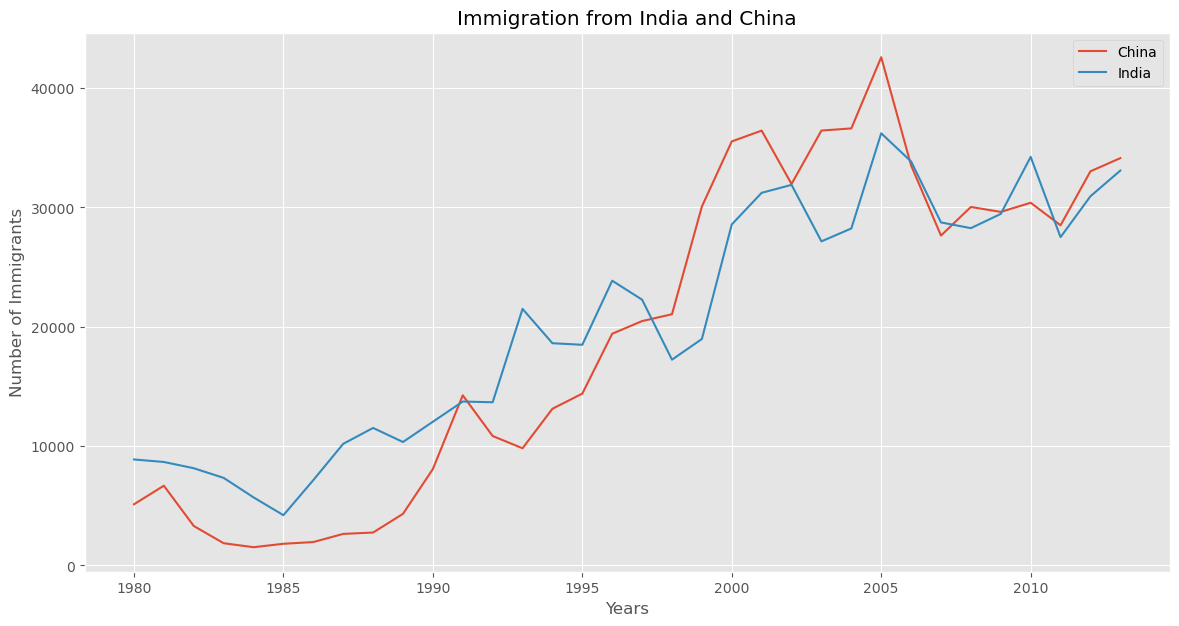

In [10]:
df_CI.plot(kind='line', figsize = (14, 7))

plt.title('Immigration from India and China')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

<br>From the above plot, we can observe that the China and India have very similar immigration trends through the years.


## C. Top 5 Countries with Highest Immigration

We will compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [11]:
# Sort the dataframe by "Total" column in descending order
df_can.sort_values(by ='Total', ascending = False, axis = 0, inplace = True)

In [12]:
# Extract the data series for top 5 countries for years 1980 - 2013, excluding the 'Total' column

df_top5 = df_can.head(5)[years]

# Transpose the dataframe to swap the row and columns.
df_top5 = df_top5.transpose()
df_top5.head(3)

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201


### Line Plot - Top 5

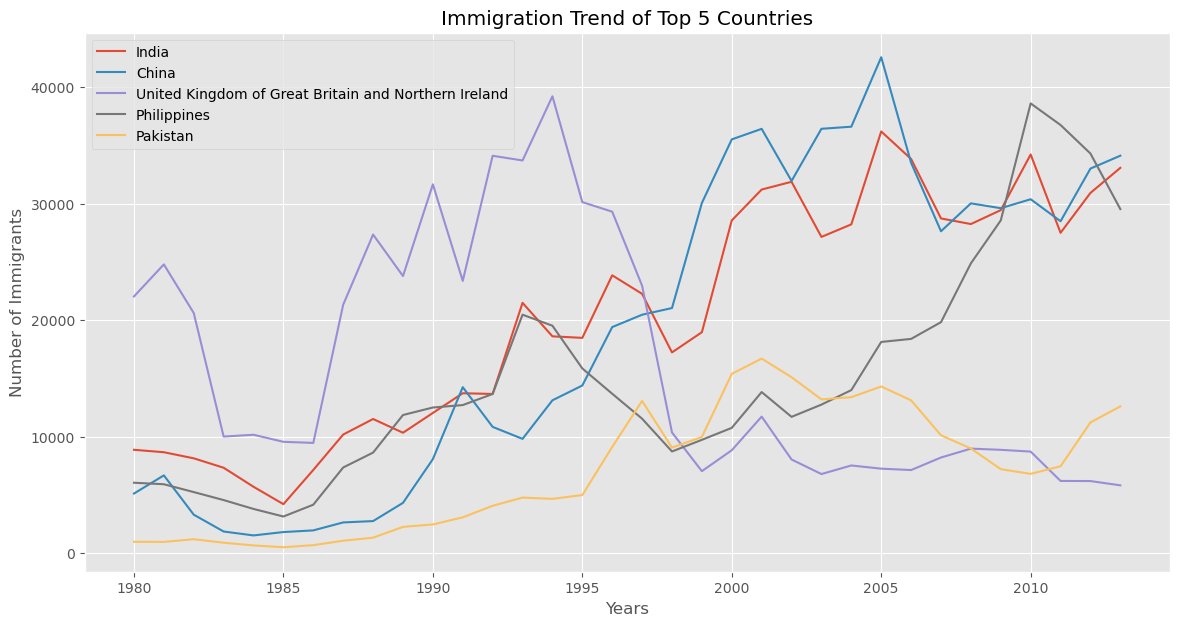

In [13]:
df_top5.plot(kind = 'line', figsize = (14, 7))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# <center>________________________________________________________________</center>

# 2. AREA PLOTS
***

## A. Top 5 Countries with Highest Immigration

At top, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. We can also visualize this as a cumulative plot, also knows as a **Stacked Line Plot** or **Area plot**.

Area plots are stacked by default. To produce an unstacked plot, we set the parameter `stacked` to value `False`.

### Area Plot (Stacked) - Top 5

Text(0.5, 0, 'Years')

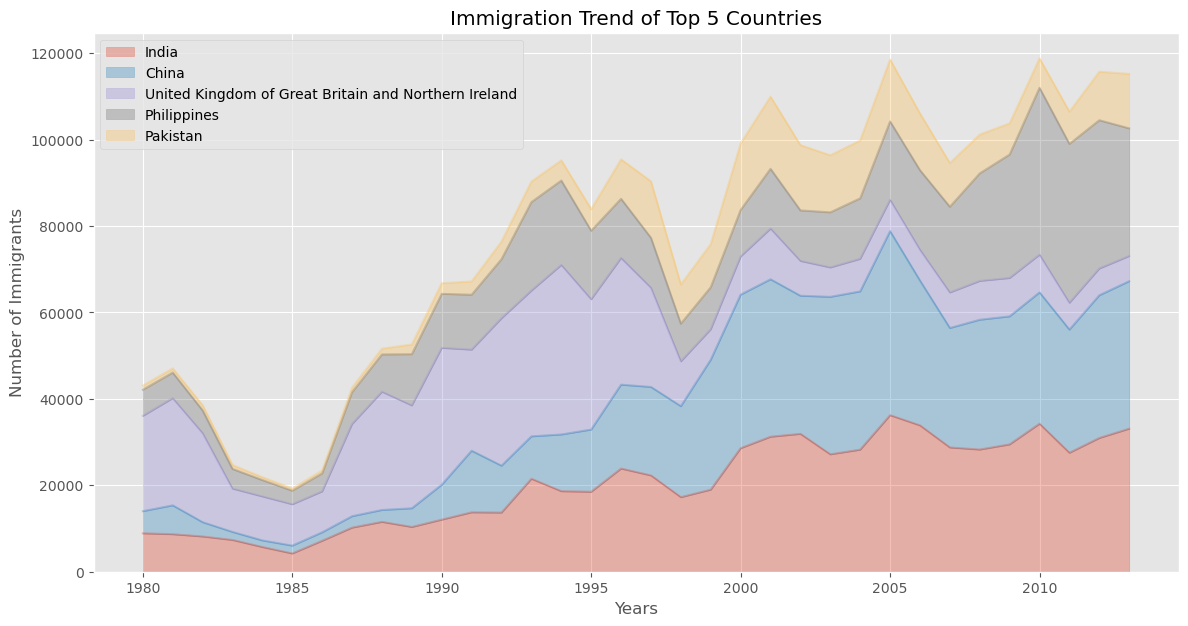

In [14]:
# Stacked Area Plot for Top 5 Countries

# Optional: Artist layer of matplotlib is used.
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(14, 7))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

### Area Plot (Unstacked) - Top 5

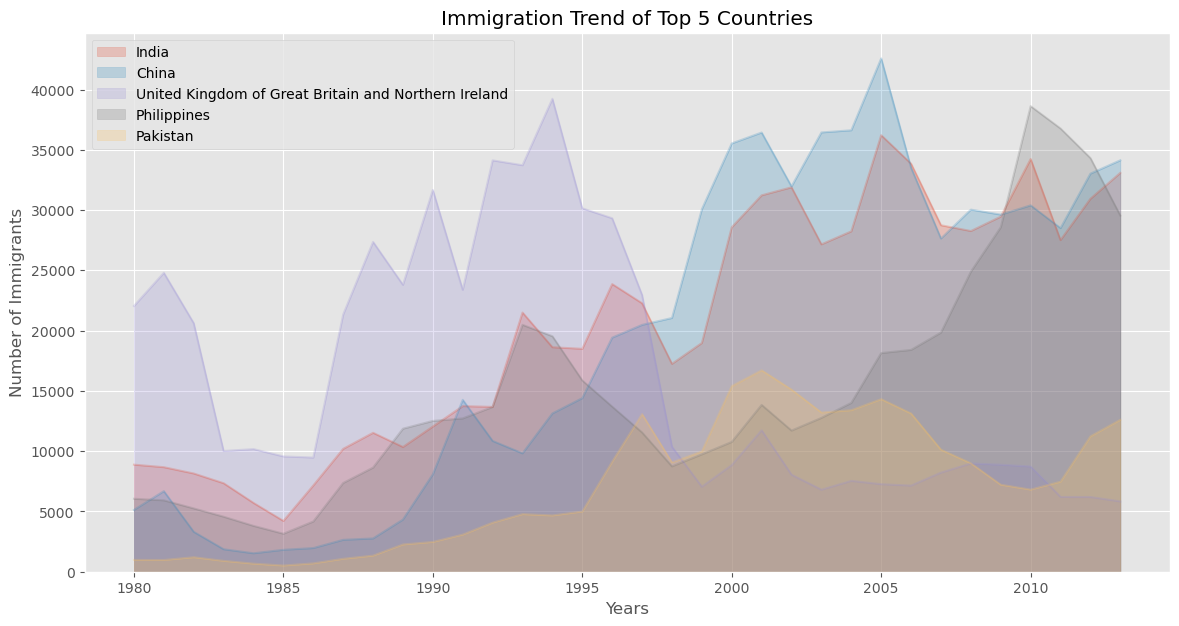

In [15]:
# Unstacked Area Plot for Top 5 Countries

df_top5.plot(kind='area',
             alpha=0.25,  #  default value alpha = 0.5
             stacked=False,
             figsize=(14, 7))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## B. Bottom 5 Countries with Lowest Immigration

We will compare the trend of bottom 5 countries that contributed the least to immigration to Canada.

In [16]:
# Extract the data series for bottom 5 countries for years 1980 - 2013, excluding the 'Total' column

df_bottom5 = df_can.tail(5)[years]

# Transpose the dataframe to swap the row and columns.
df_bottom5 = df_bottom5.transpose()
df_bottom5.head(3)

,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0


### Area Plot (Stacked) - Bottom 5

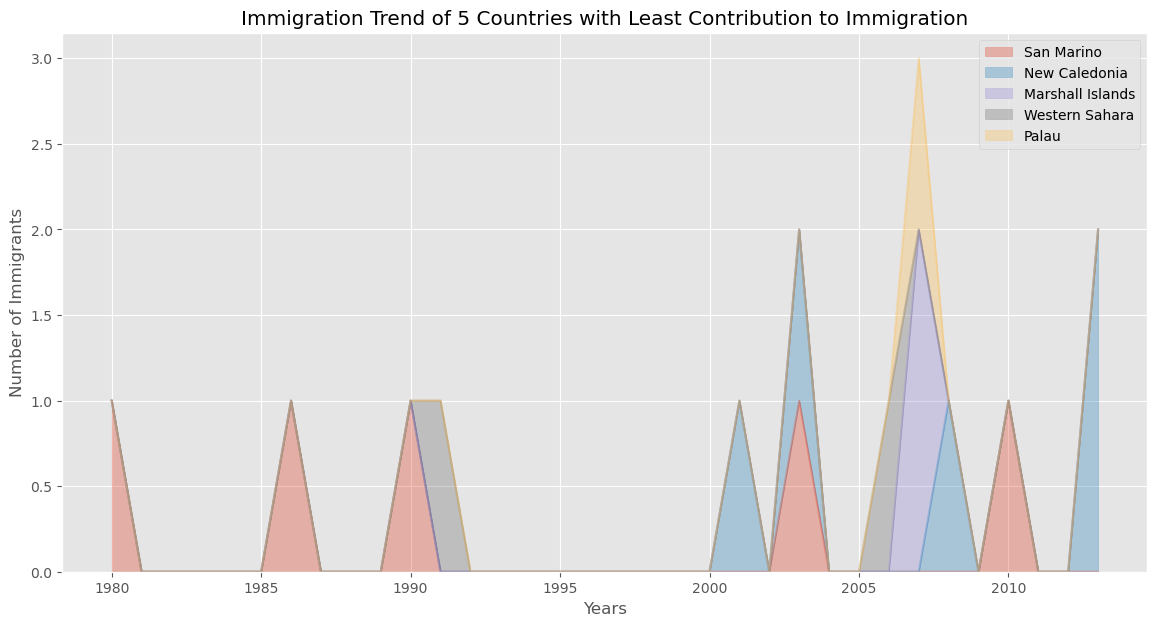

In [17]:
# Stacked Area Plot for Bottom 5 Countries

df_bottom5.plot(kind='area', alpha = 0.35, stacked = True, figsize=(14, 7))

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

# <center>________________________________________________________________</center>

# 3. HISTOGRAMS
***

## A. All Countries in 2013

We will look at the frequency distribution of the number of new immigrants from the various countries to Canada in 2013.

To examine the data split into intervals, we will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:

In [18]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width=800>


We will plot this distribution:

### Histogram - All Countries in 2013

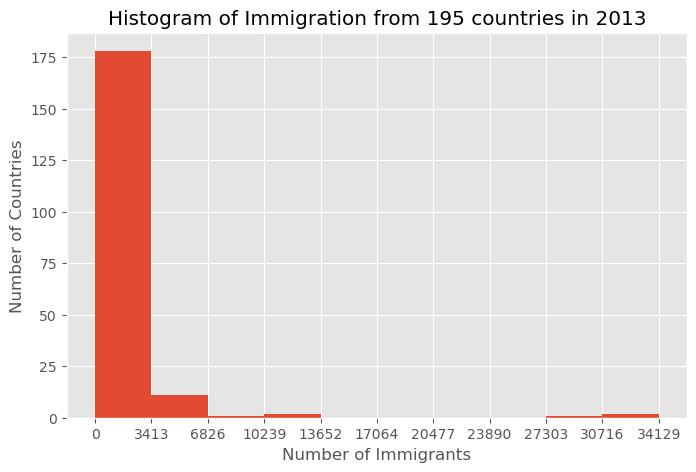

In [19]:
# to match the x-axis labels with the bin edges, pass in a `xticks` keyword that contains the list of them
df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

## B. Denmark, Norway, and Sweden

Now we will examine the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013:

In [20]:
# Extract the data series for the countries for years 1980 - 2013, excluding the 'Total' column
df_dns = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

# transpose dataframe
df_dns = df_dns.transpose()
df_dns.head(3)

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222


### Histogram (Unstacked) - Denmark, Norway, and Sweden

We will make a few modifications to improve the impact and aesthetics of the plot:

*   increase the bin size to 15 by passing in `bins` parameter;
*   set transparency to 40% by passing in `alpha` parameter;
*   change the colors of the plots by passing in `color` parameter.
*   adjust the min and max x-axis labels to remove the extra gap on the edges of the plot by passing in `xlim` paramater

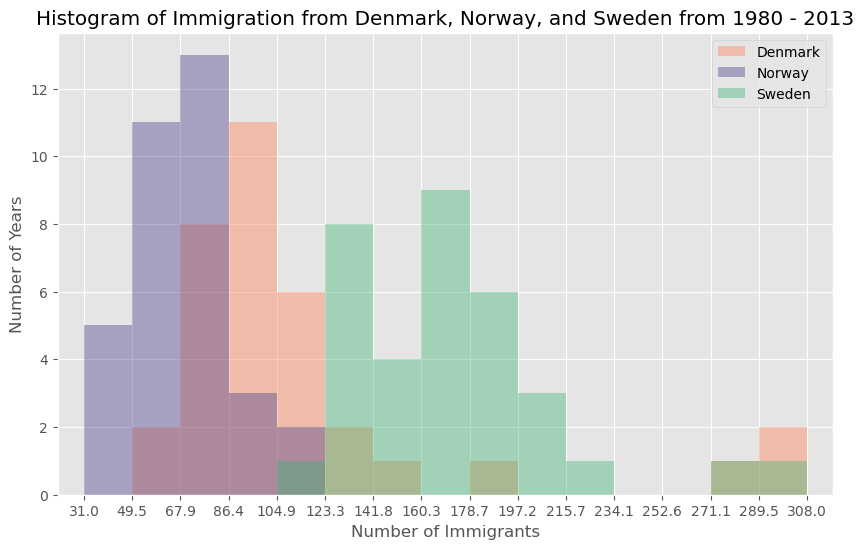

In [21]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_dns, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# un-stacked histogram
df_dns.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          alpha=0.4,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=False,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

### Histogram (Stacked) - Denmark, Norway, and Sweden

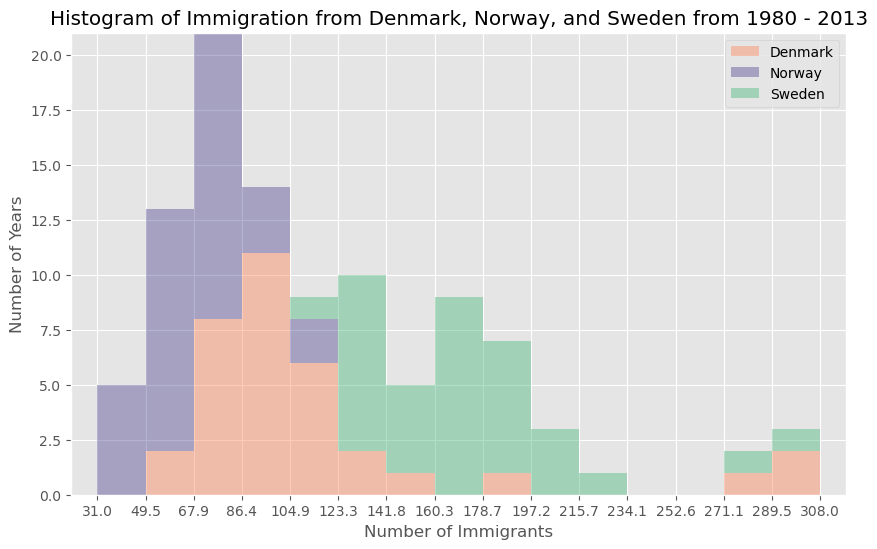

In [22]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_dns, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# un-stacked histogram
df_dns.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          alpha=0.4,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

## C. Greece, Albania, and Bulgaria

Like the previous case, now we will examine the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013. We will use a stacked plot with 15 bins.

In [23]:
# Extract the data series for the countries for years 1980 - 2013, excluding the 'Total' column
df_gab = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

# transpose dataframe
df_gab = df_gab.transpose()
df_gab.head(3)

,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12


### Histogram (Stacked) - Greece, Albania, and Bulgaria

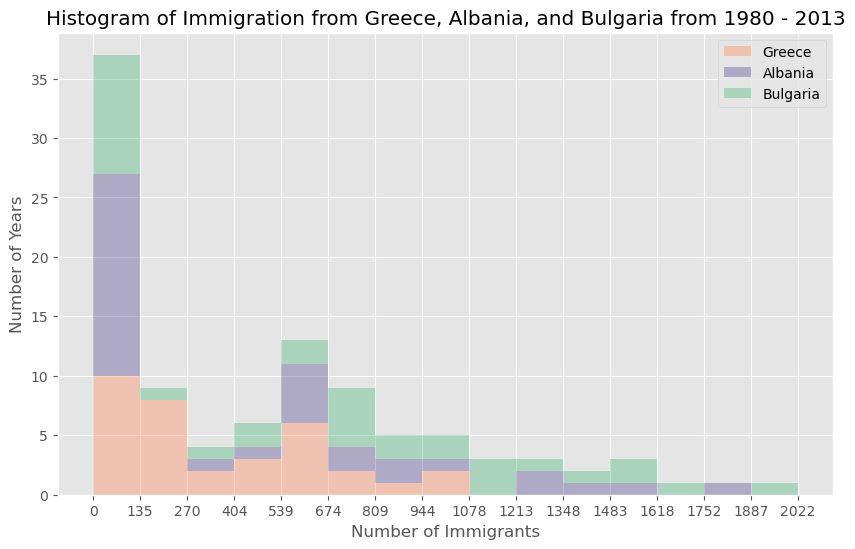

In [24]:
count, bin_edges = np.histogram(df_gab, 15)

df_gab.plot(kind='hist', figsize=(10, 6), xticks = bin_edges, alpha = 0.35, bins = 15, stacked = True,
            color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

# <center>________________________________________________________________</center>

# 4. BAR CHARTS
***

## A. Iceland - Financial Crisis

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

We will compare the number of Icelandic immigrants to Canada from year 1980 to 2013.


In [25]:
# Extract the data series for Iceland for years 1980 - 2013, excluding the 'Total' column
df_iceland = df_can.loc['Iceland', years]
df_iceland.head(3)

1980    17
1981    33
1982    10
Name: Iceland, dtype: object

### Bar Chart - Iceland

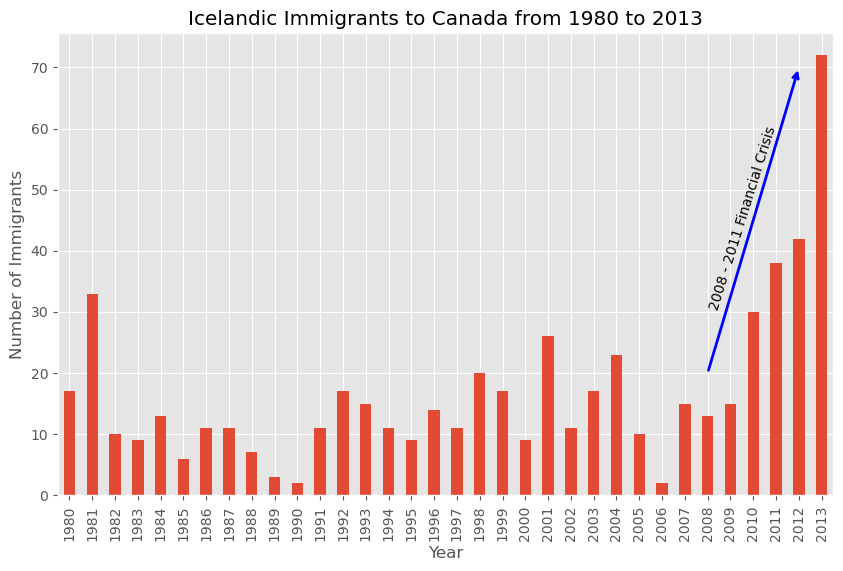

In [26]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

## B. Top 15 Countries with Highest Immigration

We will compare the total immigration of top 15 countries that contributed the most to immigration to Canada.

In [27]:
# Extract the data series for top 15 countries for the 'Total' column

df_top15 = df_can.head(15)[["Total"]]
df_top15.head(3)

,Total
India,691904
China,659962
United Kingdom of Great Britain and Northern Ireland,551500


### Bar Chart - Top 15

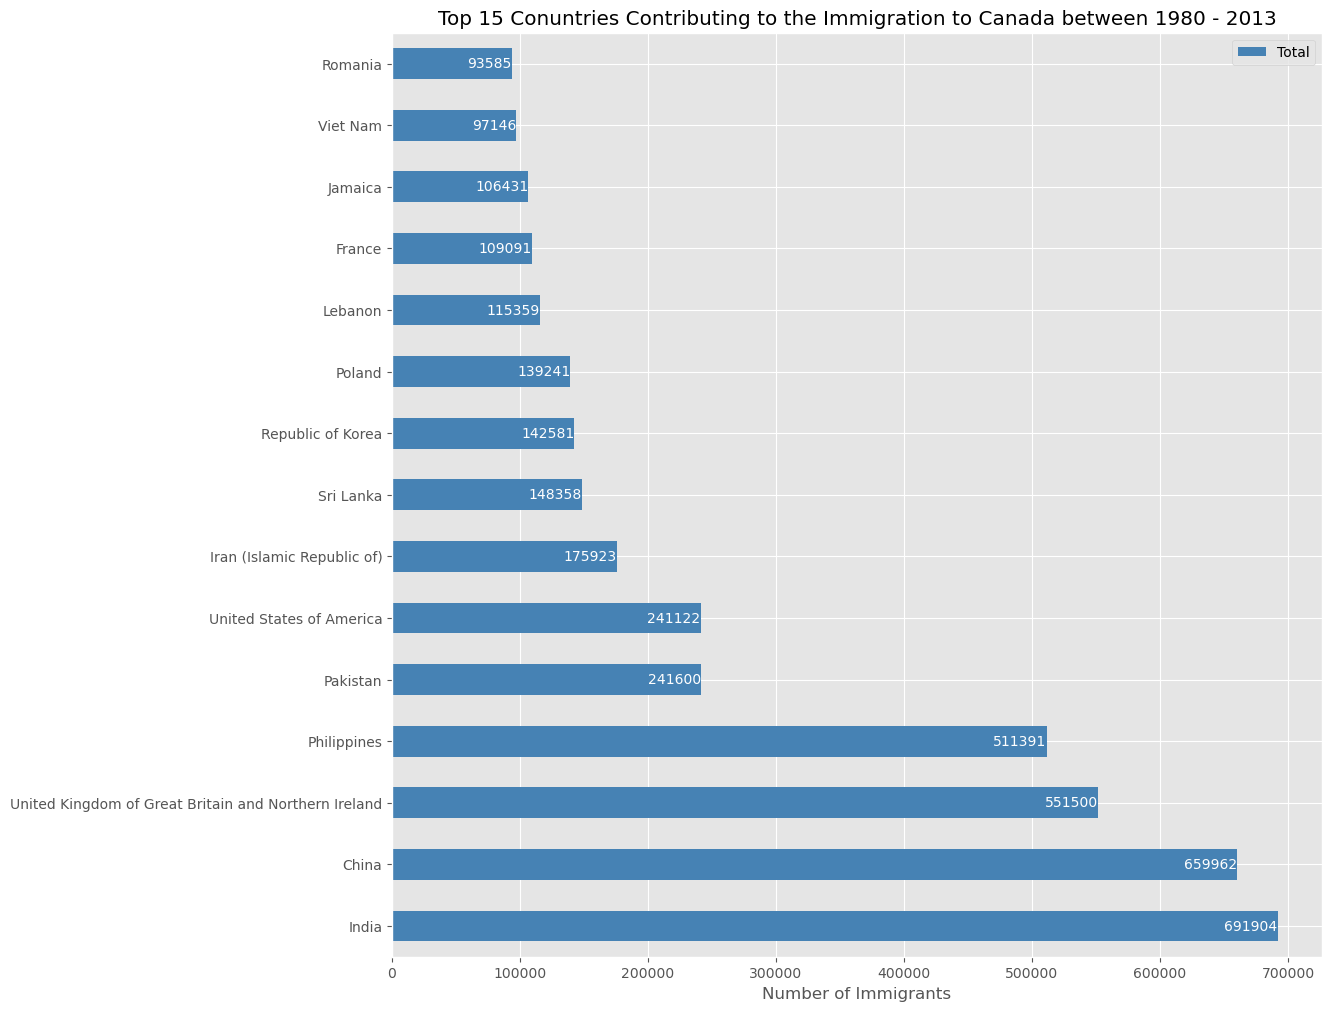

In [28]:
df_top15.plot(kind='barh', figsize = (12, 12), color = 'steelblue')

plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
plt.xlabel('Number of Immigrants')

for i in range(15):
    
    plt.annotate(df_top15.iloc[[i]].squeeze(),
                 xy=(df_top15.iloc[[i]].squeeze(), i),
                 rotation=0,  va='center', ha='right', color ='white')
    
plt.show()

# <center>________________________________________________________________</center>

# 5. PIE CHARTS
***

## A. Immigrants by Continents - Total

We will use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

In [29]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum(numeric_only=True)

df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


### Pie Chart - Continents

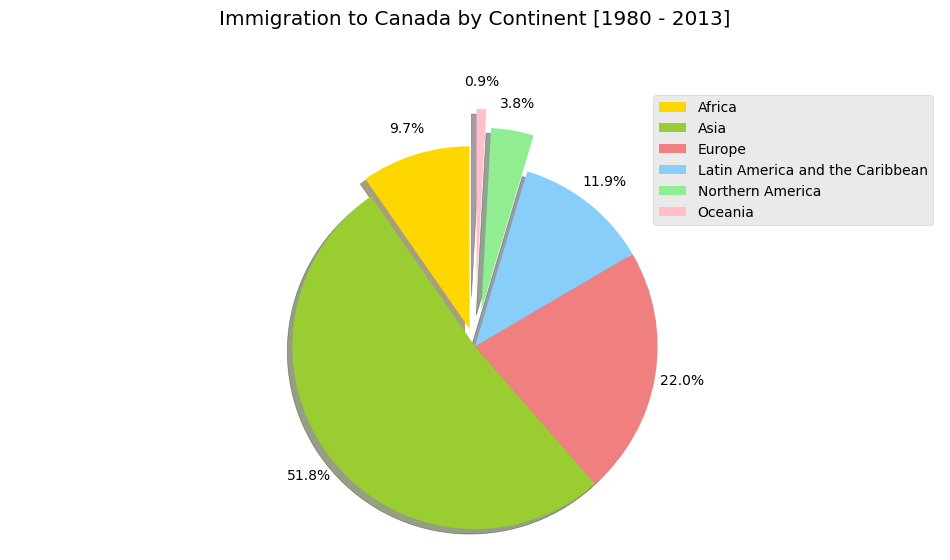

In [30]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.2, 0.3] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(12, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.xlabel('')
plt.ylabel('')
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper right') 

plt.show()

## B. Immigrants by Continents - 2013

We will use a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

### Pie Chart - Continents - 2013

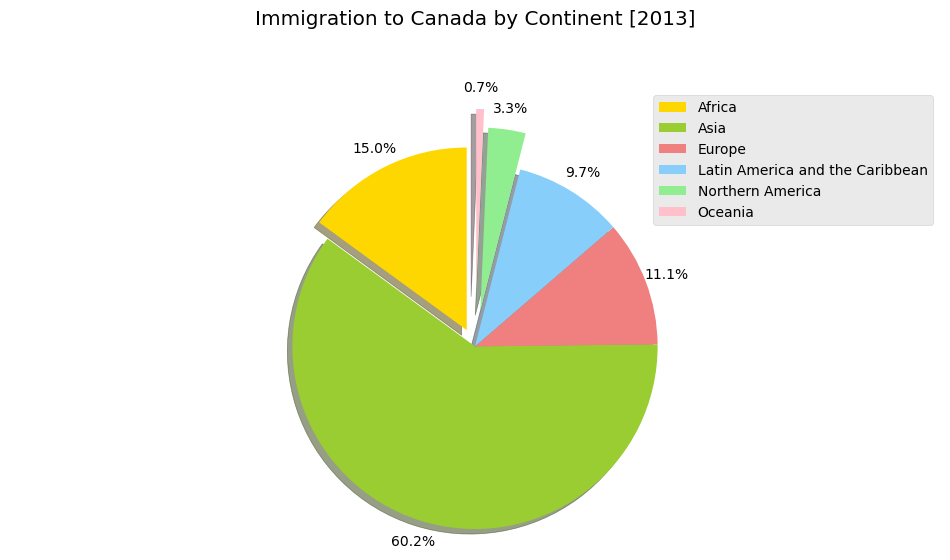

In [31]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.2, 0.3]

df_continents['2013'].plot(kind='pie',
                           figsize=(12, 6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow = True,
                           labels = None,
                           pctdistance=1.12,
                           colors=colors_list,#### Pie Chart - Continents
                           explode=explode_list)

plt.title('Immigration to Canada by Continent [2013]', y=1.12) 
plt.xlabel('')
plt.ylabel('')
plt.axis('equal')

plt.legend(labels = df_continents.index, loc='upper right')

plt.show()

# <center>________________________________________________________________</center>

# 6. BOX PLOTS
***

## A. Japan

We will plot the box plot for the Japanese immigrants between 1980 - 2013.

Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.


In [32]:
# Extract the data series for Iceland for years 1980 - 2013, excluding the 'Total' column

df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head(3)

,Japan
1980,701
1981,756
1982,598


### Box Plot - Japan

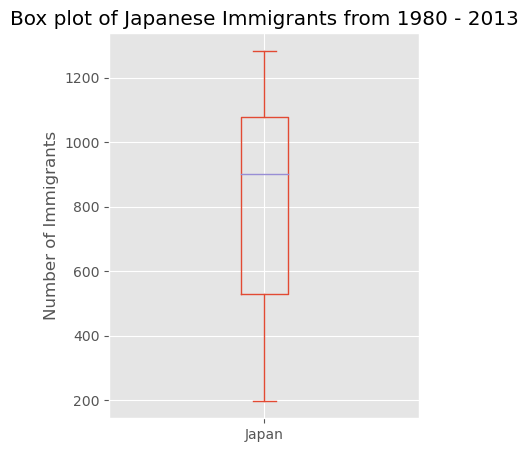

In [33]:
df_japan.plot(kind='box', figsize=(4, 5))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can immediately make a few key observations from the plot above:

1.  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of \~500 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of \~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.


In [34]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


## B. China vs. India

Previously, we observed that China and India had very similar immigration trends. We will analyze these two countries further using box plots and compare the distribution of the number of new immigrants from China and India for the period 1980 - 2013.

In [35]:
# percentiles associated with both countries
df_CI.describe()

,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


### Box Plot - China vs. India

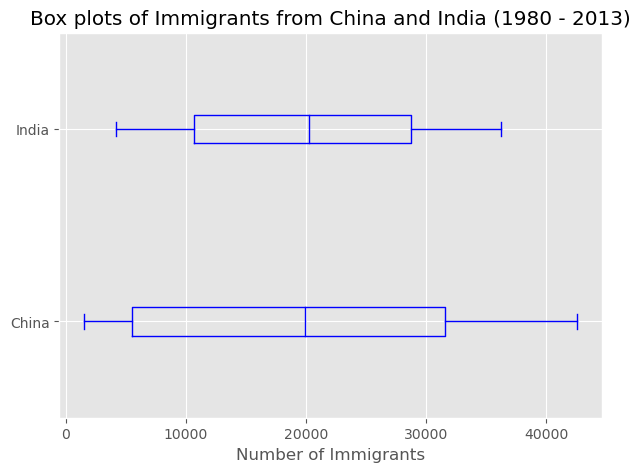

In [36]:
df_CI.plot(kind='box', figsize=(7, 5), color='blue', vert=False) # optional: horizontal box plot

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

We can observe that, while both countries have around the same median immigrant population (\~20,000),  China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).


### Subplot - China vs. India

We will perform a side-by-side comparison of the box and the line plot of China vs. India's immigration, which we created previously:

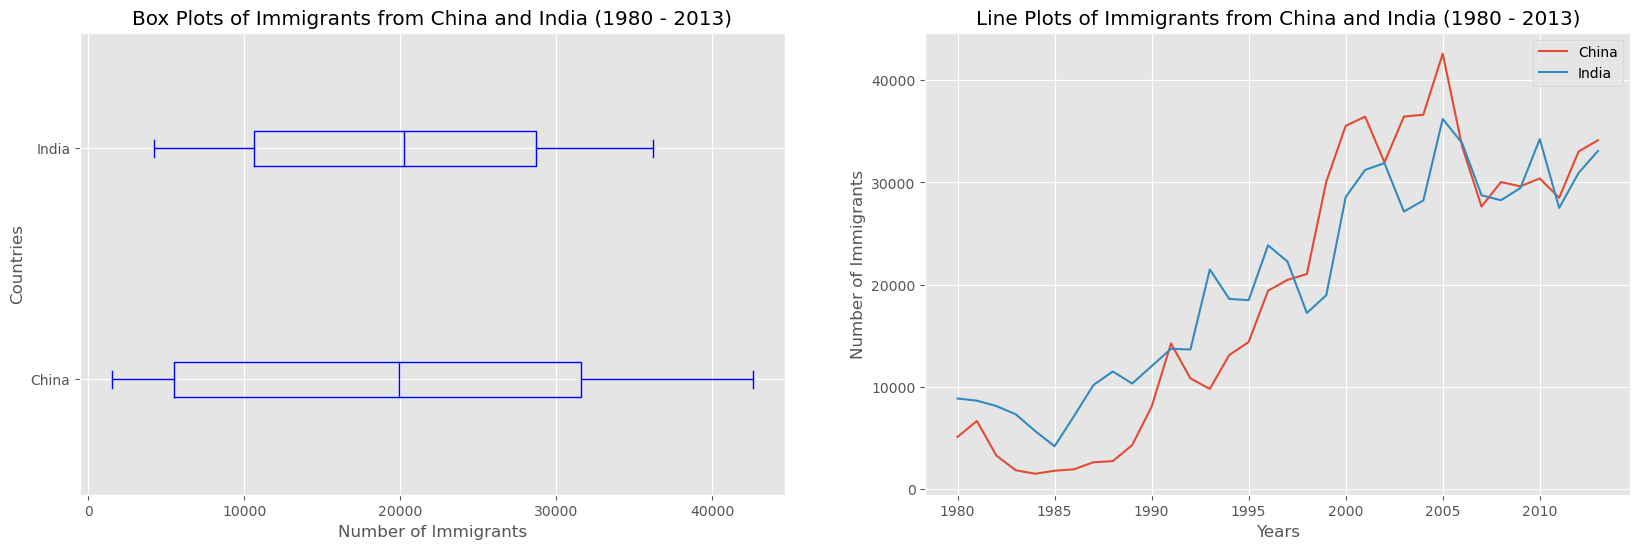

In [37]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

## C. Top 15 Countries with Highest Immigration

Previously we identified the top 15 countries based on total immigration from 1980 - 2013.

Now we create a box plot to visualize the distribution of the top 15 countries grouped by the *decades* `1980s`, `1990s`, and `2000s`.


In [38]:
# Extract the data series for top 15 countries for years 1980 - 2013, excluding the 'Total' column

df_top15 = df_can.head(15)
df_top15 = df_top15.loc[df_top15.index, years]
df_top15

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501
Iran (Islamic Republic of),1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,...,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291
Sri Lanka,185,371,290,197,1086,845,1838,4447,2779,2758,...,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394
Republic of Korea,1011,1456,1572,1081,847,962,1208,2338,2805,2979,...,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509
Poland,863,2930,5881,4546,3588,2819,4808,6931,9211,16025,...,1533,1405,1263,1235,1267,1013,795,720,779,852


In [39]:
# create a new dataframe which contains the aggregate for each decade

# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

# slice the original dataframe df_top15 to create a series for each decade and sum across all years for each country
df_80s = df_top15.loc[:,years_80s].sum(axis=1)
df_90s = df_top15.loc[:,years_90s].sum(axis=1)
df_00s = df_top15.loc[:,years_00s].sum(axis=1)

# merge the three series into a new data frame
df_top15_dec = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s': df_00s, })
df_top15_dec

,1980s,1990s,2000s
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183
Poland,57602,64864,13629


Statistics associated with the dataframe:

In [40]:
df_top15_dec.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


### Box Plot - Top 15 by Decades

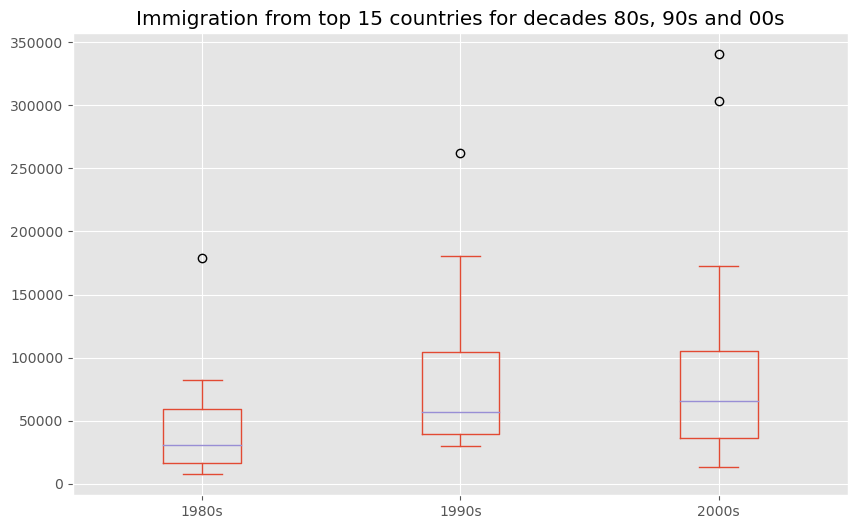

In [41]:
df_top15_dec.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 00s')
plt.show()

In terms of min and max values, the box plot differs from the summary table created. Because the box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.

If we look at decade 2000s as an example: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 \* 69,404) <br>
Outlier > 209,611.5


In [42]:
# check how many entries fall above the outlier threshold 

outliers = df_top15_dec[['2000s']]
outliers[outliers['2000s']>209611.5]

,2000s
India,303591
China,340385


China and India are both considered as outliers since their population for the decade exceeds 209,611.5.

# <center>________________________________________________________________</center>

# 7. SCATTER PLOTS
***

## A. All Countries Combined

We will visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.


In [43]:
# get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


### Scatter Plot - All Countries Combined

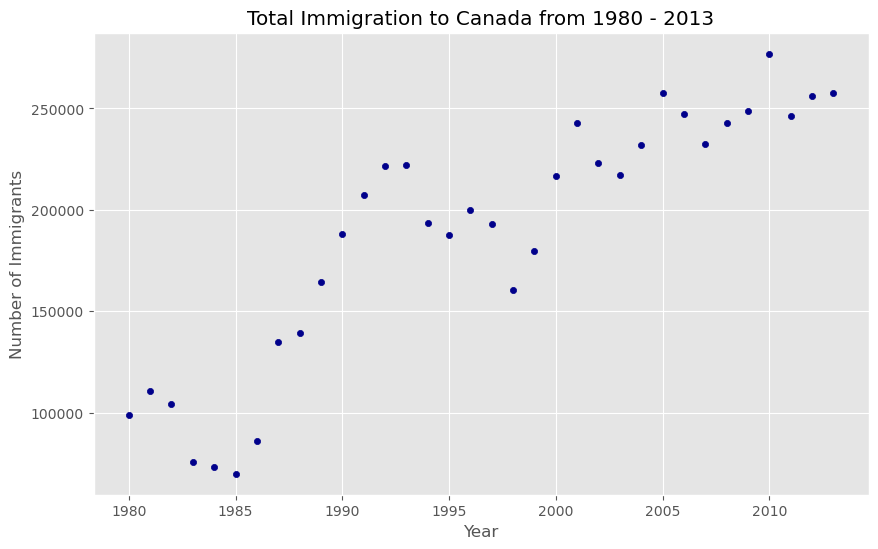

In [44]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

## B. All Countries Combined with Regression Line

We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line. So we will try to plot a regression line, and use it to  predict the number of immigrants in 2015.

In [45]:
# get the equation of line of best fit
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis

fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a * x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1.

### Scatter Plot with Regression Line - All Countries Combined

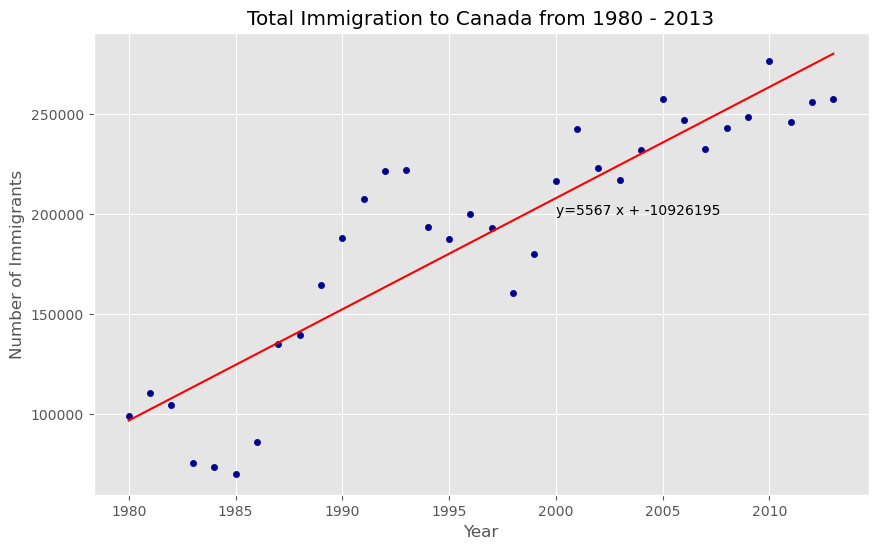

'No. Immigrants = 5567 * Year + -10926195'

In [46]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot the regression line
plt.plot(x, fit[0] * x + fit[1], color='red')

# annotate the equation of the line
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 200000))

plt.show()

# print out the line
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```

When compared to the actual from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01), we see that Canada accepted **271,845** immigrants in 2015. Our estimated value of **291,310** is within **7%** of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.


## C. Denmark, Norway, and Sweden with Regression Line (seaborn)

In [47]:
# Extract the data series for the countries for years 1980 - 2013, excluding the 'Total' column
df_dns = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

df_tot_dns = pd.DataFrame(df_dns.sum(axis=0))
df_tot_dns.index = map(float, df_tot_dns.index)
df_tot_dns.reset_index(inplace=True)

df_tot_dns.columns = ['Year', 'Total']

df_tot_dns.head()

,Year,Total
0,1980.0,669
1,1981.0,678
2,1982.0,627
3,1983.0,333
4,1984.0,252


### Scatter Plot with Regression Line - Denmark, Norway, and Sweden

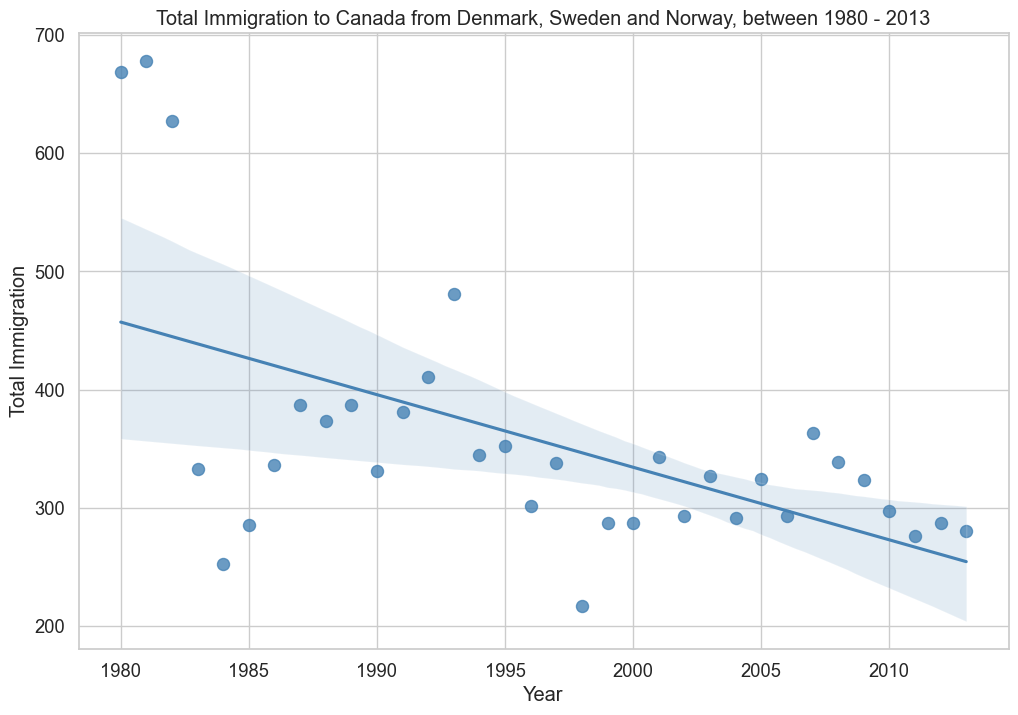

In [48]:
plt.figure(figsize=(12, 8))

sns.set(font_scale=1.2)
sns.set_style('whitegrid')

ax = sns.regplot(x='Year', y='Total', data=df_tot_dns, color='steelblue', marker='.', scatter_kws={'s': 300})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from Denmark, Sweden and Norway, between 1980 - 2013')
plt.show()


# <center>________________________________________________________________</center>

# 8. BUBBLE PLOTS
***

## A. Argentina's Great Depression

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

We will analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. We will do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.

In [49]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int (useful for regression)
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head(3)

,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0


### Normalized Weights

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01) to bring all values into the range \[0, 1]. The general formulation is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.


In [50]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

### Bubble Plot - Argentina vs. Brazil

*   To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter (artist layout).
*   We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
    *   multiply weights by 2000 to scale it up on the graph, and,
    *   add 10 to compensate for the min value (which has a 0 weight and therefore scale with $\times 2000$).


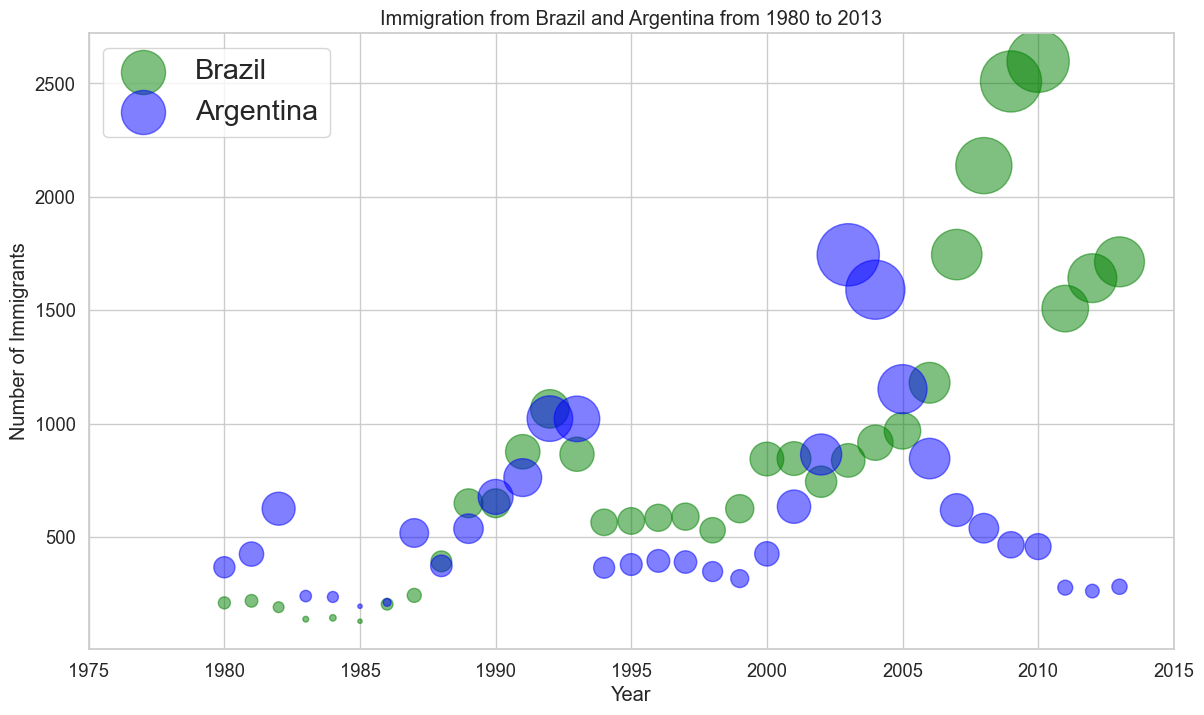

In [51]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.


## B. China vs. India

Previously we created box plots to compare immigration from China and India to Canada. Now we will create the bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013.

### Normalized Weights

In [52]:
# normalized Chinese data
norm_china = (df_can_t['China']-df_can_t['China'].min())/(df_can_t['China'].max()-df_can_t['China'].min())

# normalized Indian data
norm_india = (df_can_t['India']-df_can_t['India'].min())/(df_can_t['India'].max()-df_can_t['India'].min())

### Bubble Plot - China vs. India

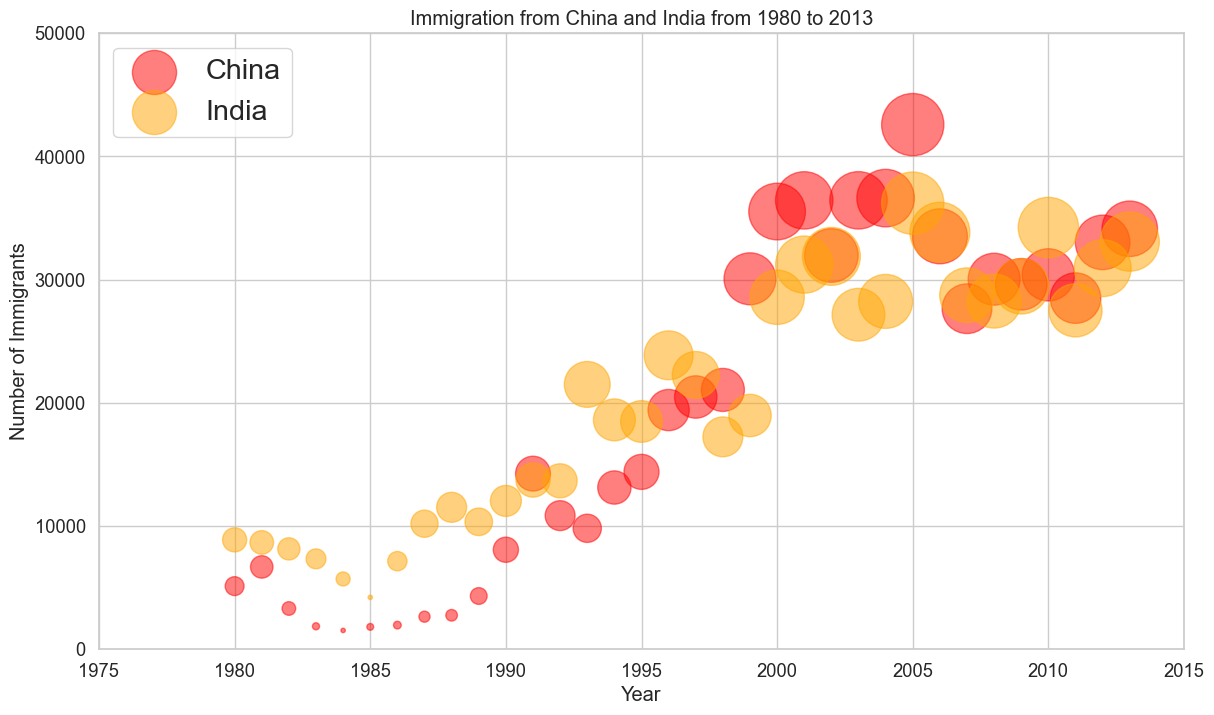

In [53]:
# China
ax0 = df_can_t.plot(kind='scatter',
                   x='Year', y='China',
                   figsize=(14, 8),
                   alpha=0.5,
                   color='red',
                   s=norm_china * 2000 + 10,
                   xlim=(1975, 2015),
                   ylim=(0, 50000))

# India
ax0 = df_can_t.plot(kind='scatter',
                   x='Year', y='India',
                   alpha=0.5,
                   color="orange",
                   s=norm_india * 2000 + 10,
                   ax=ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 to 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

# <center>________________________________________________________________</center>

# 9. CHOROPLETH MAP
***

A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area, or it shows the level of variability within a region.

## A. All Countries

In [54]:
# to use country names as a variable, we will reset our dataframe's index and rename it

df_can.reset_index(inplace=True)
df_can.rename(columns={"index": "Country"},inplace=True)

In order to create a `Choropleth` map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. In our case, we want a GeoJSON that defines the boundaries of all world countries. We will download it and name it **world_countries.geojson**.

In [55]:
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
response = requests.get(url)

with open("world_countries.geojson", "w", encoding='utf-8') as file:
    file.write(response.text)
    
world_geo = r'world_countries.geojson' # GeoJSON file

### Choropleth Map - All Countries

In [56]:
# Create a base map
world_map = folium.Map(location=[50, -0], zoom_start=1.5)

# Generate the choropleth map
folium.Choropleth(
    geo_data=world_geo, # GeoJSON file
    name='choropleth',
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name', # key in the GeoJSON file that contains the name of the countries
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

# Display the map
world_map

As per our `Choropleth` map legend, the darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the US.


# <center>________________________________________________________________</center>

# 10. Waffle Charts
***

## A. Denmark, Norway, and Sweden

With a waffle chart, we can visualize the proportional relation between the three countries.

In [57]:
# Setting "Country" column as index after we used in choropleth map
df_can.set_index('Country', inplace=True)
df_can.index.name = None

In [58]:
# Extract the data series for countries
df_dns = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


`waffle` charts are not built into any of the Python visualization libraries. Therefore, we will create it from scratch:

### Proportions

In [59]:
# Determine the proportion of each category with respect to the total.

# compute the proportion of each category with respect to the total
total_values = df_dns['Total'].sum()
category_proportions = df_dns['Total'] / total_values

# Define the overall size of the `waffle` chart.

width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

# Determine the respective number of tiles.

# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})#### Waffle Chart - Denmark, Norway, and Sweden

,Number of tiles
Denmark,129
Norway,77
Sweden,194


### Creating Waffle Matrix

Now we will create a matrix that resembles the `waffle` chart:

In [60]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint) # 0 matrix, dtype: unsigned integer

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):            
            category_index += 1 # ...proceed to the next category       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


The matrix of `waffle` chart:

In [61]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Waffle Chart - Denmark, Norway, and Sweden

<Figure size 640x480 with 0 Axes>

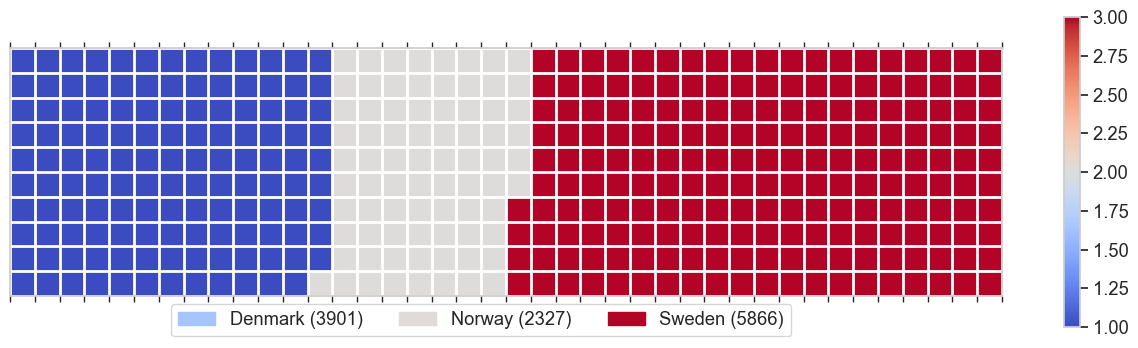

In [62]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dns['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dns.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

### "create_waffle_chart()" Function

It would be very inefficient to repeat these steps every time we wish to create a `waffle` chart. So we can combine all the steps into one function called *create_waffle_chart*. This function would take the following parameters as input:

> 1.  **categories**: Unique categories or classes in dataframe.
> 2.  **values**: Values corresponding to categories or classes.
> 3.  **height**: Defined height of waffle chart.
> 4.  **width**: Defined width of waffle chart.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.


In [63]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dns.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

Now to create a `waffle` chart, we can call the function with the input parameters:

In [64]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dns.index.values # categories
values = df_dns['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

### Waffle Chart with Function - Denmark, Norway, and Sweden

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

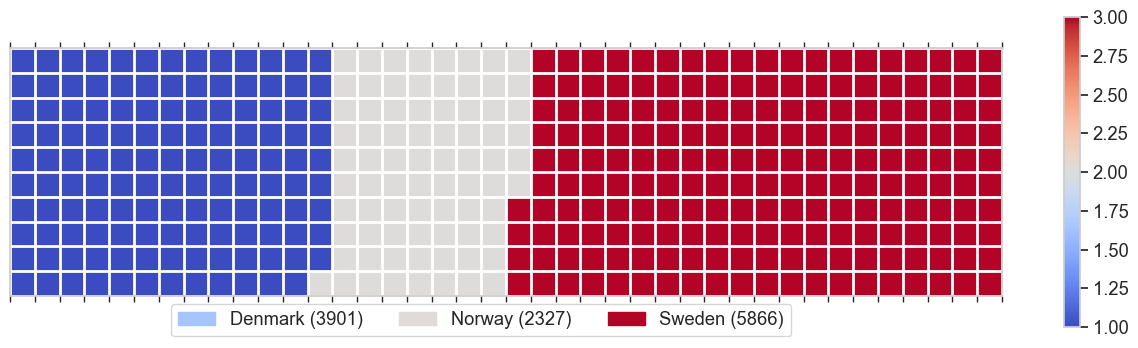

In [65]:
create_waffle_chart(categories, values, height, width, colormap)

# <center>________________________________________________________________</center>

# 11. WORD CLOUDS
***

Word clouds are commonly used to perform high-level analysis and visualization of text data. Unfortunately, our immigration data does not have any text data, but we can generate a sample text data of 90 words from our immigration dataset.

## A. Top 15 Countries with Highest Immigration

By using the countries with single-word names, we will duplicate each country's name based on how much they contribute to the total immigration.

In [66]:
# the total immigration from 1980 to 2013

total_immigration = df_can['Total'].sum()

max_words = 90
word_string = ''

for country in df_can.index.values:
    
    # check if country's name is a single-word name
    if country.count(" ") == 0:
        
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
print(word_string)

# create the word cloud object
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

India India India India India India India India India China China China China China China China China China Philippines Philippines Philippines Philippines Philippines Philippines Philippines Pakistan Pakistan Pakistan Poland Lebanon France Jamaica Romania Haiti Guyana Portugal Egypt Morocco Colombia 
Word cloud created!


### World Cloud - Top Countries

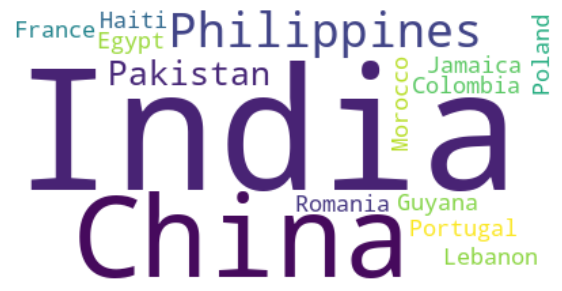

In [67]:
# display the cloud
plt.figure(figsize=(7, 9))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

According to the above word cloud, the majority of the people who immigrated came from one of the 15 countries that are displayed.

# <center>________________________________________________________________</center>